In [63]:
import numpy as np
from skimage.io import imread,imsave, imshow
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from skimage.exposure import equalize_hist
from cv2 import calcHist, equalizeHist

In [64]:
img = imread('yuyu-hakusho-01.jpg')
img2 = imread('yuyu-hakusho-02.jpg')
img3 = imread('yuyu-hakusho-03.jpg')
img4 = imread('yuyu-hakusho-04.jpg')

Text(0.5, 1.0, 'Imagem 04')

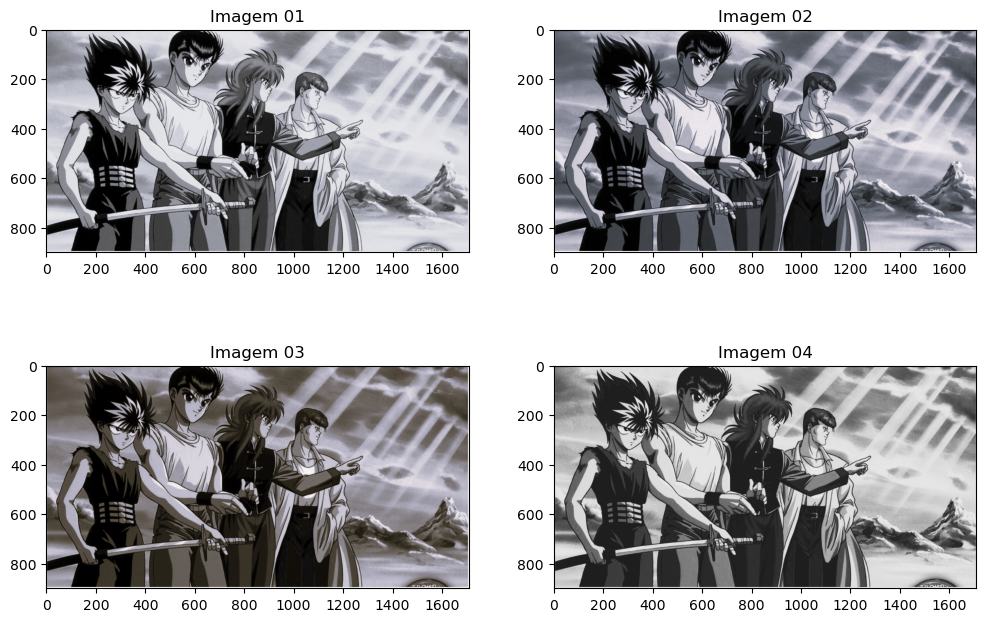

In [65]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.set_title('Imagem 01')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2)
ax2.set_title('Imagem 02')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img3)
ax3.set_title('Imagem 03')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img4)
ax4.set_title('Imagem 04')

Text(0.5, 1.0, 'Histograma 04')

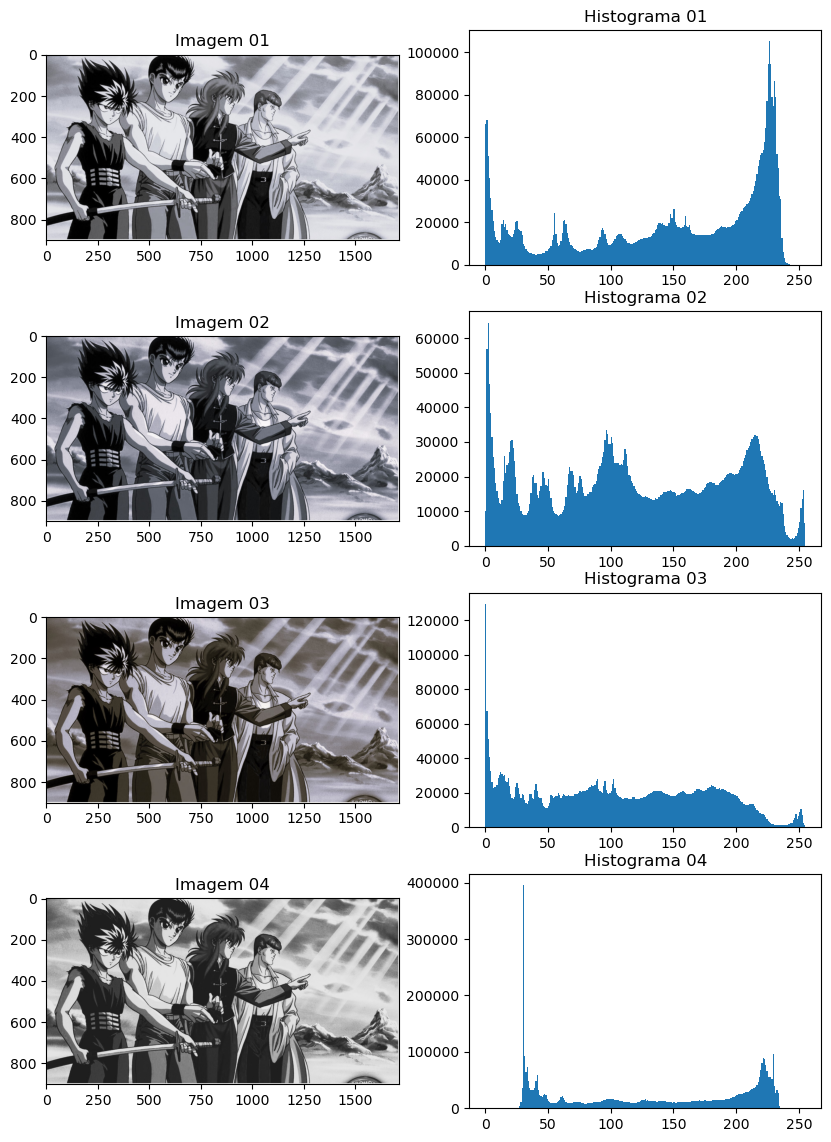

In [66]:
fig, ax = plt.subplots(4, 2, figsize=(10,14))

ax[0, 0].imshow(img)
ax[0, 0].set_title('Imagem 01')
ax[0,1].hist(img.ravel(),range(256))
ax[0,1].set_title('Histograma 01')

ax[1, 0].imshow(img2)
ax[1, 0].set_title('Imagem 02')
ax[1,1].hist(img2.ravel(),range(256))
ax[1,1].set_title('Histograma 02')

ax[2, 0].imshow(img3)
ax[2, 0].set_title('Imagem 03')
ax[2,1].hist(img3.ravel(),range(256))
ax[2,1].set_title('Histograma 03')

ax[3, 0].imshow(img4)
ax[3, 0].set_title('Imagem 04')
ax[3,1].hist(img4.ravel(),range(256))
ax[3,1].set_title('Histograma 04')

In [67]:
newHist = equalize_hist(img)
newHist2 = equalize_hist(img2)
newHist3 = equalize_hist(img3)
newHist4 = equalize_hist(img4)

Text(0.5, 1.0, 'Histograma Equalizado')

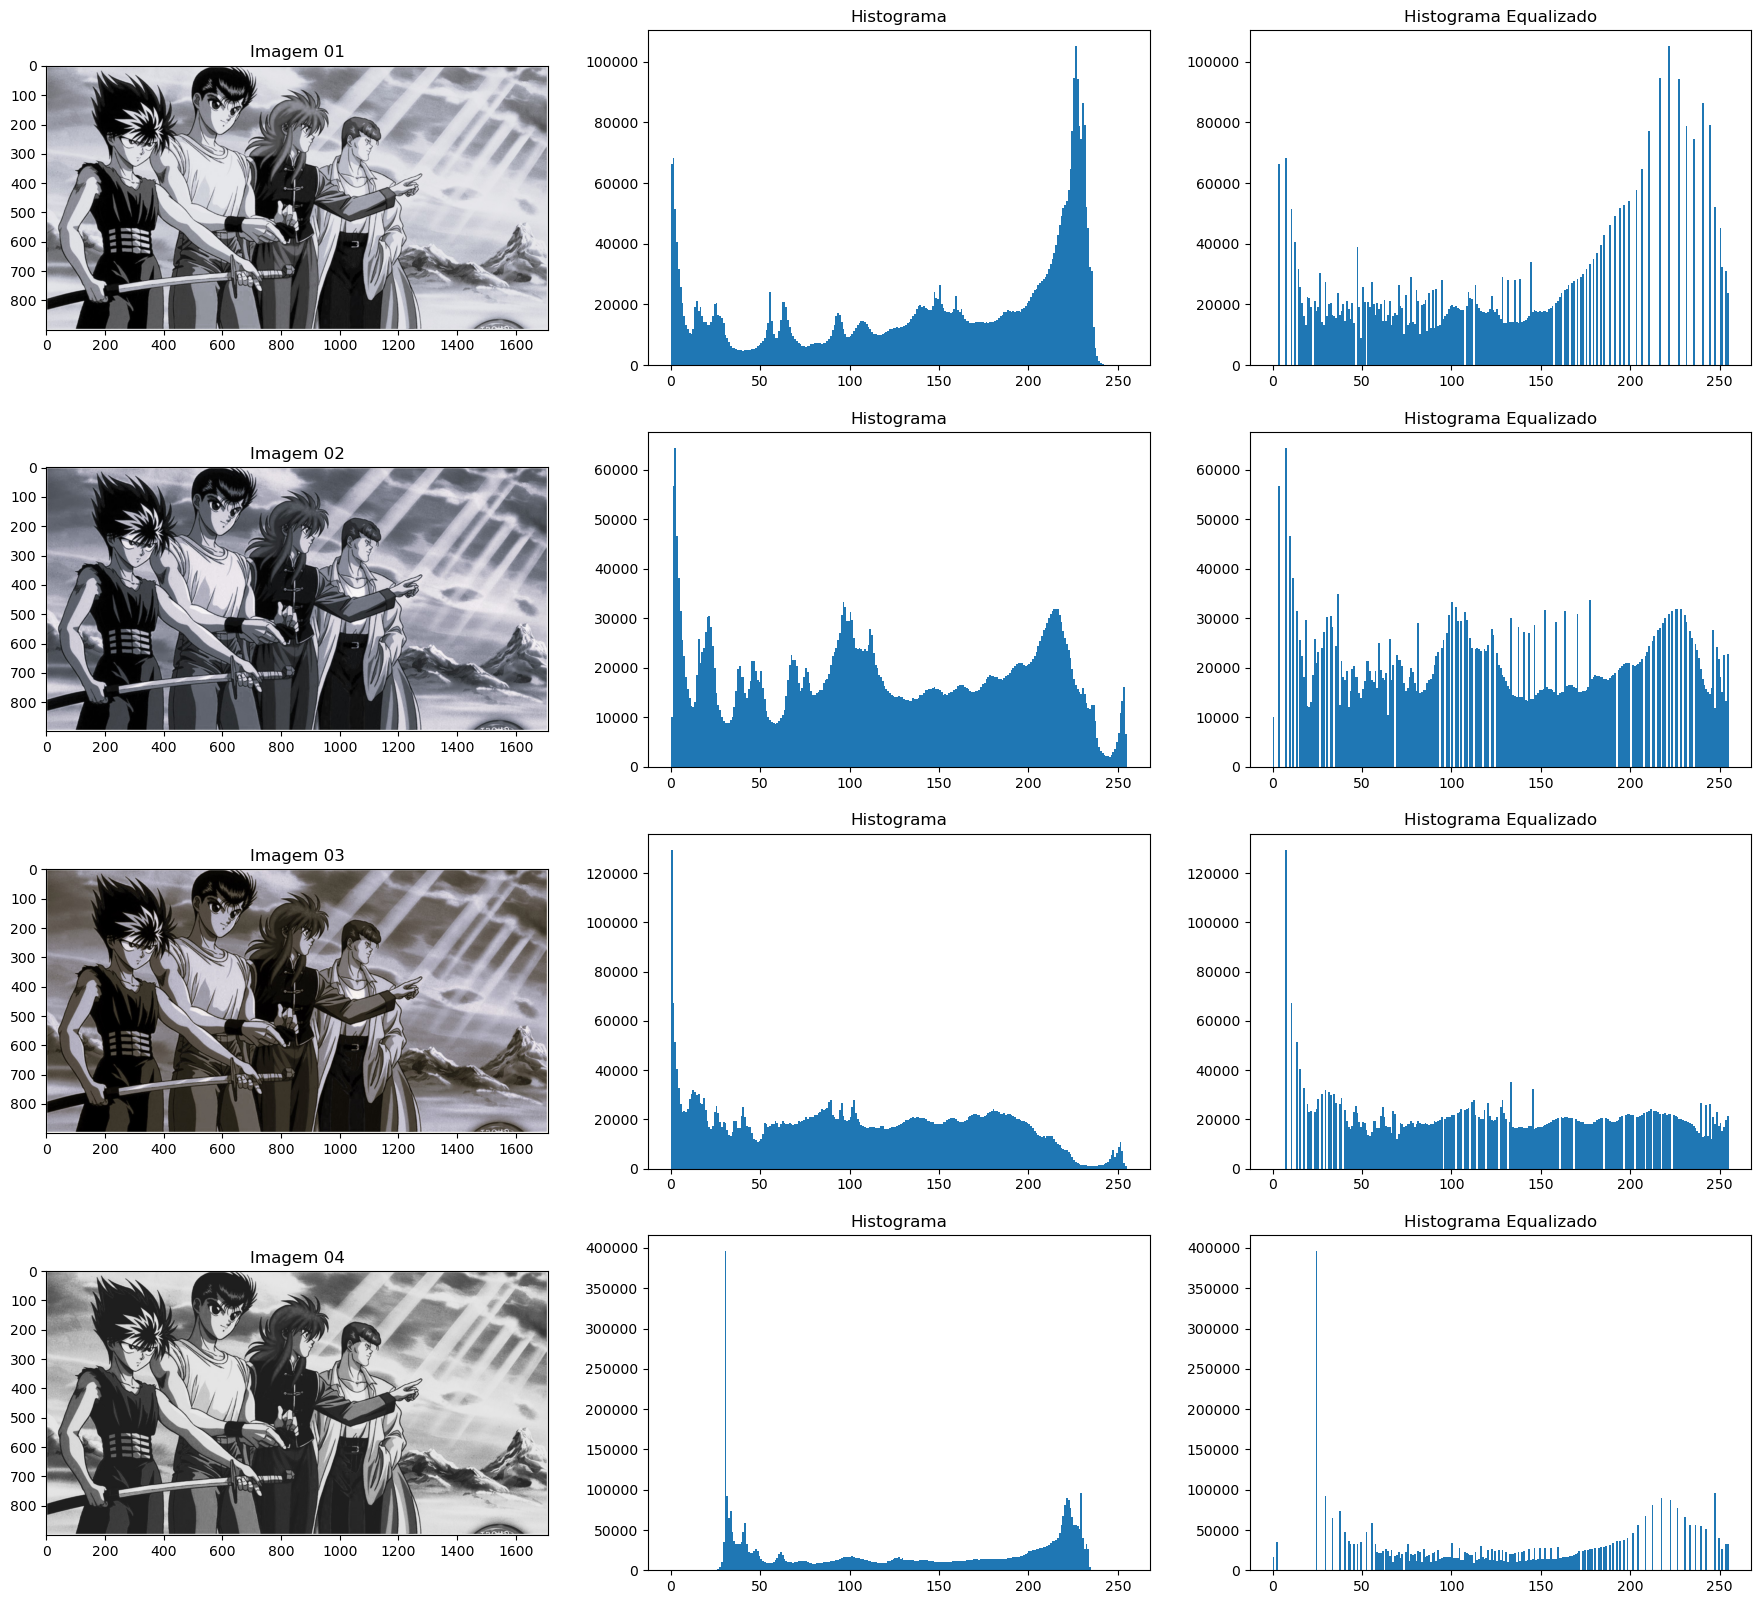

In [68]:
fig, ax = plt.subplots(4,3, figsize=(22,20))

ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Imagem 01')
ax[0,1].hist(img.ravel(),range(256))
ax[0,1].set_title('Histograma')
ax[0,2].hist(newHist.ravel()*255,range(256))
ax[0,2].set_title('Histograma Equalizado')
ax[1,0].imshow(img2,cmap='gray')
ax[1,0].set_title('Imagem 02')
ax[1,1].hist(img2.ravel(),range(256))
ax[1,1].set_title('Histograma')
ax[1,2].hist(newHist2.ravel()*255,range(256))
ax[1,2].set_title('Histograma Equalizado')
ax[2,0].imshow(img3,cmap='gray')
ax[2,0].set_title('Imagem 03')
ax[2,1].hist(img3.ravel(),range(256))
ax[2,1].set_title('Histograma')
ax[2,2].hist(newHist3.ravel()*255,range(256))
ax[2,2].set_title('Histograma Equalizado')
ax[3,0].imshow(img4,cmap='gray')
ax[3,0].set_title('Imagem 04')
ax[3,1].hist(img4.ravel(),range(256))
ax[3,1].set_title('Histograma')
ax[3,2].hist(newHist4.ravel()*255,range(256))
ax[3,2].set_title('Histograma Equalizado')

In [69]:
def getPmf(hist, totalPixels):
    for i in range(len(hist)):
       hist[i] = hist[i]/totalPixels
    return hist

def getCdf(pmf):
    for i in range(1, len(pmf)):
        pmf[i] = pmf[i]+pmf[i-1]
    return pmf

def normalize(cdf):
    for i in range(len(cdf)):
        cdf[i] = cdf[i]*255
    return cdf

def equalizeImg(img):
    hist = calcHist([img],[0],None,[256],[0,256])
    pmf = getPmf(hist, img.shape[0]*img.shape[1])
    cdf = getCdf(pmf)
    newCdf = normalize(cdf)
    newImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newImg[i,j] = newCdf[img[i,j]]
    return newImg
    
def equalizeImgRGB(img):
    img2 = img.copy()
    for i in range(3):
        img2[:,:,i] = equalizeImg(img2[:,:,i])
    return img2

Text(0.5, 1.0, 'Histograma Equalizado Img 01 (manual)')

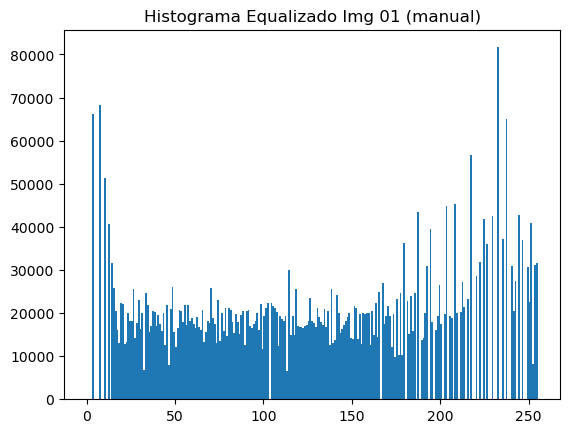

In [70]:
eq = equalizeImgRGB(img)
plt.hist(eq.ravel(),range(256))
plt.title('Histograma Equalizado Img 01 (manual)') 

In [71]:
eqHist = equalizeImgRGB(img)
eqHist2 = equalizeImgRGB(img2)
eqHist3 = equalizeImgRGB(img3)
eqHist4 = equalizeImgRGB(img4)

Text(0.5, 1.0, 'Equalização (manual)')

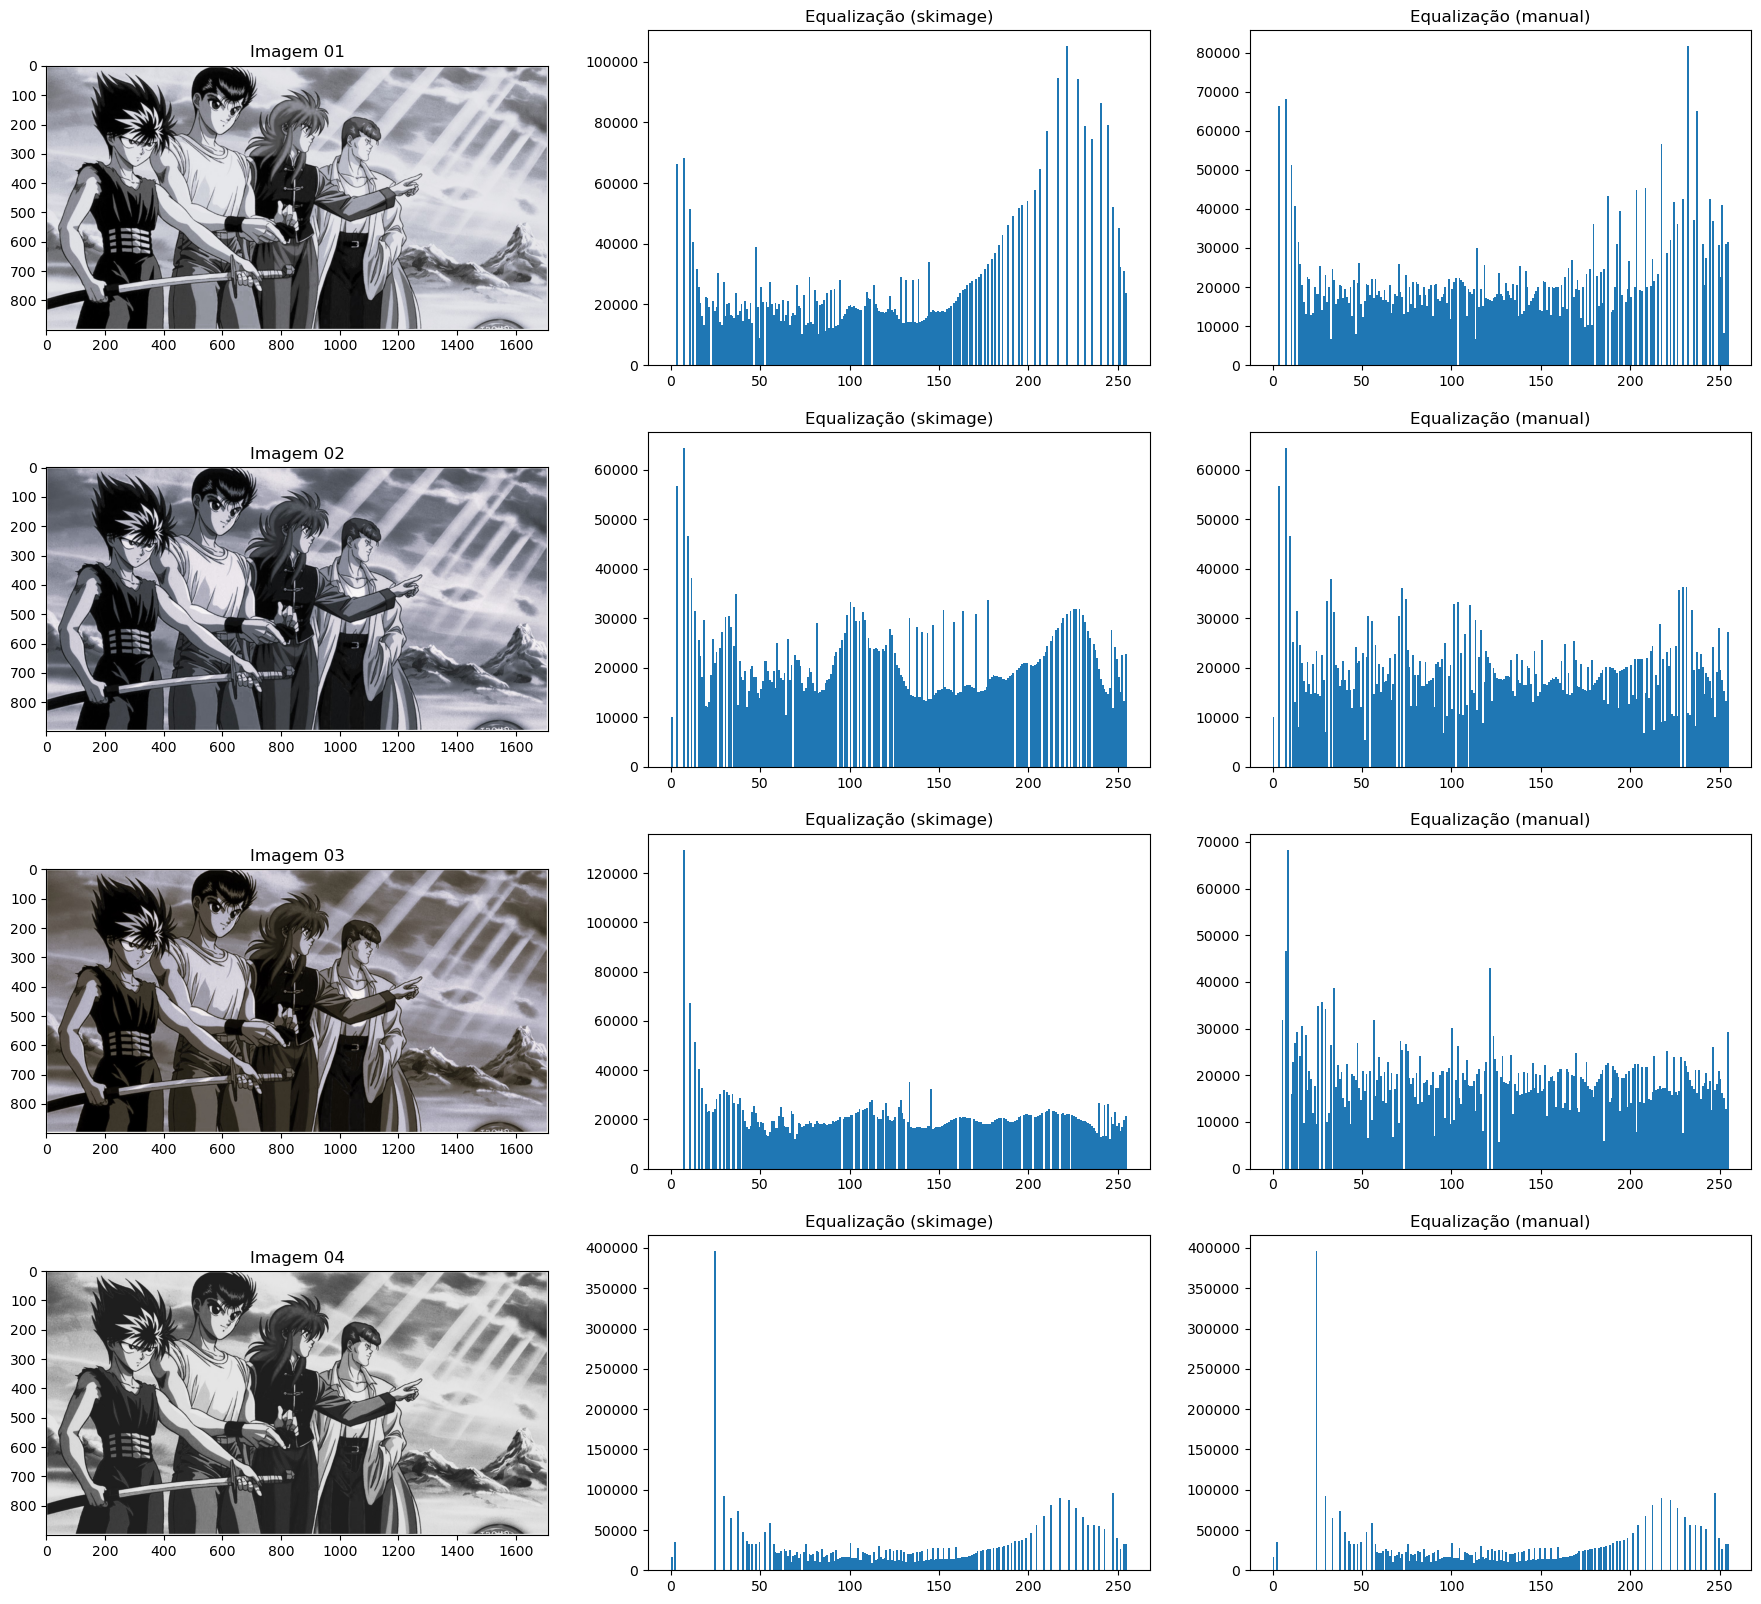

In [72]:
fig, ax = plt.subplots(4,3, figsize=(22,20))
ax[0,0].imshow(img)
ax[0,0].set_title('Imagem 01')
ax[0,1].hist(newHist.ravel()*255,range(256))
ax[0,1].set_title('Equalização (skimage)')
ax[0,2].hist(eqHist.ravel(),range(256))
ax[0,2].set_title('Equalização (manual)')
ax[1,0].imshow(img2)
ax[1,0].set_title('Imagem 02')
ax[1,1].hist(newHist2.ravel()*255,range(256))
ax[1,1].set_title('Equalização (skimage)')
ax[1,2].hist(eqHist2.ravel(),range(256))
ax[1,2].set_title('Equalização (manual)')
ax[2,0].imshow(img3)
ax[2,0].set_title('Imagem 03')
ax[2,1].hist(newHist3.ravel()*255,range(256))
ax[2,1].set_title('Equalização (skimage)')
ax[2,2].hist(eqHist3.ravel(),range(256))
ax[2,2].set_title('Equalização (manual)')
ax[3,0].imshow(img4)
ax[3,0].set_title('Imagem 04')
ax[3,1].hist(newHist4.ravel()*255,range(256))
ax[3,1].set_title('Equalização (skimage)')
ax[3,2].hist(eqHist4.ravel(),range(256))
ax[3,2].set_title('Equalização (manual)')